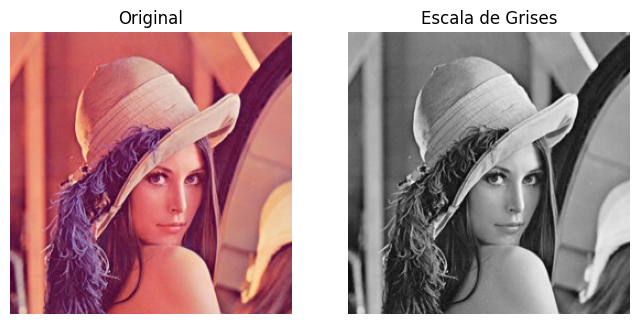

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from scipy.stats import multivariate_normal
%matplotlib inline


# Leemos la imagen de Lenna
imagen = mpimg.imread("C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/lenna.jpg")
# Leemos la imagen de la textura
imagen_textura = mpimg.imread("C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/textura.png")

# Convertimos la imagen a escala de grises
imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)
#imagen_gris_textura = cv2.cvtColor(imagen_textura, cv2.COLOR_RGB2GRAY)

# Creamos una figura para contener ambas subtramas
plt.figure(figsize=(8, 4))

# Mostramos la imagen original
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, posición 1
plt.imshow(imagen)
plt.title("Original")
plt.axis('off')  # Oculta los ejes para una visualización más limpia

# Mostramos la imagen en escala de grises
plt.subplot(1, 2, 2) # 1 fila, 2 columnas, posición 2
plt.imshow(imagen_gris, cmap="gray")
plt.title("Escala de Grises")
plt.axis('off')  # Oculta los ejes para una visualización más limpia

# Mostramos la imagen original
#plt.subplot(1, 2, 1) # 1 fila, 2 columnas, posición 1
#plt.imshow(imagen_textura)
#plt.title("Original")
#plt.axis('off')  # Oculta los ejes para una visualización más limpia

# Mostramos la imagen en escala de grises
#plt.subplot(1, 2, 2) # 1 fila, 2 columnas, posición 2
#plt.imshow(imagen_gris_textura, cmap="gray")
#plt.title("Escala de Grises")
#plt.axis('off')  # Oculta los ejes para una visualización más limpia

plt.show()

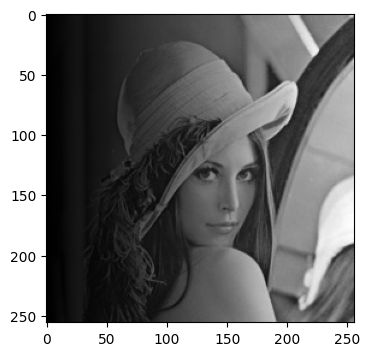

In [13]:
# Agregamos el factor de iluminación a la imagen por medio de un gradiente

def generar_sombreado(imagen):
    filas, columnas = imagen.shape[:2]
    sombreado = np.ones((filas, columnas), dtype=np.float32)
    # Crear un gradiente horizontal para simular el sombreado
    for i in range(columnas):
        sombreado[:, i] *= i / columnas
    return sombreado

# Generar y aplicar sombreado ficticio
sombreado = generar_sombreado(imagen_gris)
imagen_sombreada = cv2.multiply(imagen_gris.astype(np.float32), sombreado[:, :, np.newaxis])
#imagen_sombreada_textura = cv2.multiply(imagen_gris_textura.astype(np.float32), sombreado[:, :, np.newaxis])

plt.figure(figsize=(4,4))
plt.imshow(imagen_sombreada, cmap = "gray")

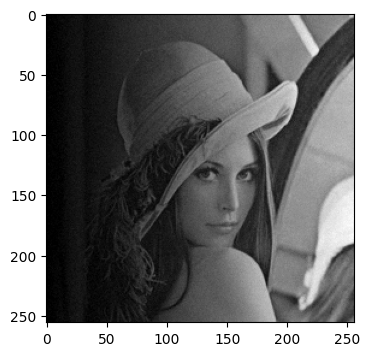

In [17]:
# Agregamos ruido gaussiano a la imagen generada con gradiente

def anadir_ruido_gaussiano(imagen_sombreada):
    filas, columnas = imagen_sombreada_textura.shape

    # Generar el ruido gaussiano
    media = 0
    varianza = 10
    sigma = varianza ** 0.5

    # Crear una matriz de ruido gaussiano del mismo tamaño que la imagen
    ruido_gaussiano = np.random.normal(media, sigma, (filas, columnas)).reshape(filas, columnas)

    # Añadir el ruido a la imagen original
    imagen_con_ruido = cv2.add(imagen_sombreada.astype(np.float32), ruido_gaussiano.astype(np.float32))
    #imagen_con_ruido_textura = cv2.add(imagen_sombreada_textura.astype(np.float32), ruido_gaussiano.astype(np.float32))

    
    return imagen_con_ruido

# Se añade ruido a la imagen
imagen_con_ruido = anadir_ruido_gaussiano(imagen_sombreada)
#imagen_con_ruido = anadir_ruido_gaussiano(imagen_sombreada_textura)

# Convertir la imagen con ruido a un formato válido (uint8) y asegurar que los valores estén en el rango correcto
imagen_con_ruido = np.clip(imagen_con_ruido, 0, 255).astype(np.uint8)

plt.figure(figsize=(4,4))
plt.imshow(imagen_con_ruido, cmap = "gray")

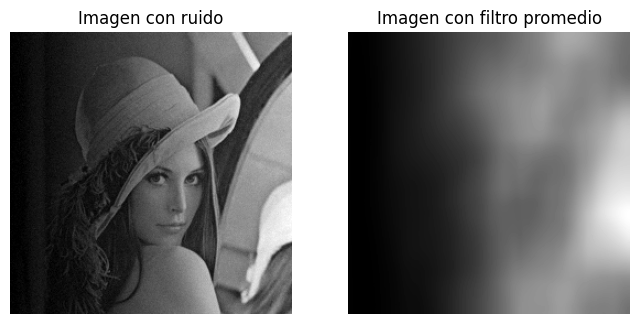

In [20]:
# Definir kernel (filtro)
k = 30
tama = 2 * k + 1
kernel = np.ones((tama,tama),np.float32) / (tama**2)

#print(kernel)
# Imprimir el filtro
#plt.imshow(kernel)

# Operación de convolución 2D entre el filtro y la imagen
# Se utiliza la función filter 2D de OpenCV
imagen_filtrada = cv2.filter2D(imagen_con_ruido,-1,kernel)

# Creamos una figura para contener ambas subtramas
plt.figure(figsize=(8, 4))

# Mostramos la imagen con ruido
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, posición 1
plt.imshow(imagen_con_ruido, cmap="gray")
plt.title("Imagen con ruido")
plt.axis('off')  # Oculta los ejes para una visualización más limpia

# Mostramos la imagen con filtro promedio
plt.subplot(1, 2, 2) # 1 fila, 2 columnas, posición 2
plt.imshow(imagen_filtrada, cmap="gray")
plt.title("Imagen con filtro promedio")
plt.axis('off')  # Oculta los ejes para una visualización más limpia

plt.show()

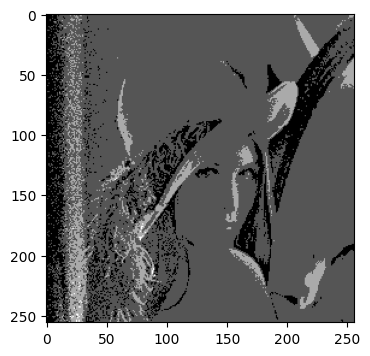

In [21]:
# Se realiza la divisón entre la g(x,y) entre la h(x,y) estimada para obtener la f(x,y) estimada

f_estimada = cv2.divide(imagen_con_ruido,imagen_filtrada)

resultado_normalizado = cv2.normalize(f_estimada, None, 0, 255, cv2.NORM_MINMAX)

plt.figure(figsize=(4,4))
plt.imshow(f_estimada, cmap = "gray")

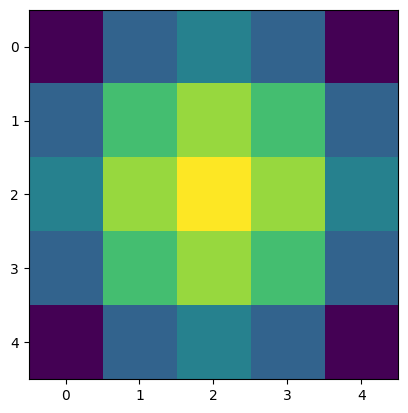

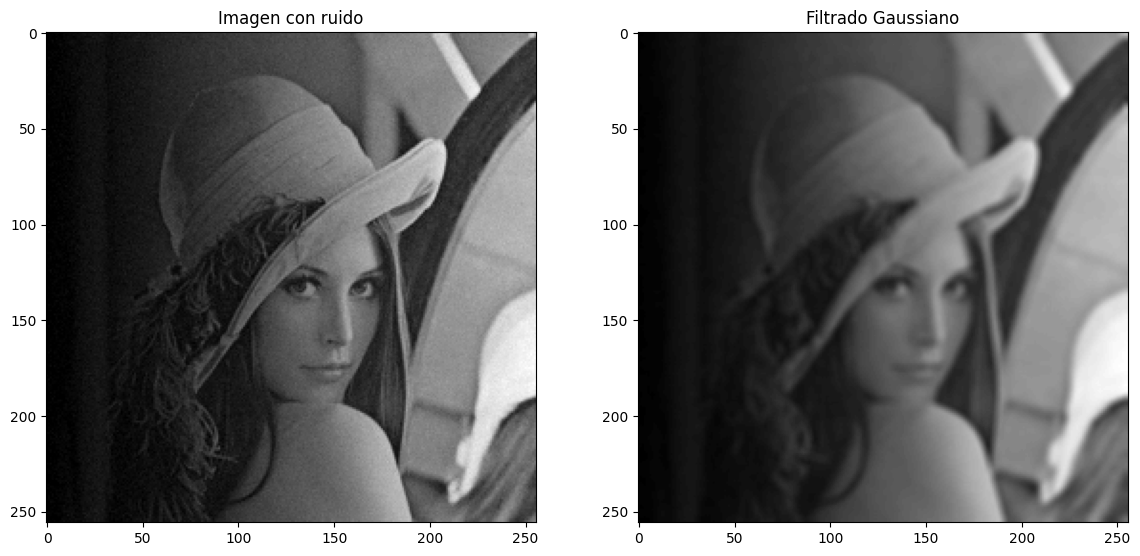

In [30]:
########################## SE REALIZAN EL MISMO EXPERIMENTO PERO CON FILTRO GAUSSIANO ####################################

k = 2
tama = 2 * k + 1

# Definir los parámetros de la función gaussiana
mean = [0, 0]
cov = [[8,0],[0,8]]

# Se rellena el kernel
kernel_gaussiano = np.zeros((tama,tama), np.float32)

for i in range(tama):
    for j in range(tama):
        x = [-k + i, -k + j]
        w = multivariate_normal.pdf(x, mean, cov)
        kernel_gaussiano[i,j] = w

# Se imprime el kernel
plt.imshow(kernel_gaussiano)

# Operación de convolución 2D entre el kernel que genermaos y la imagen objetivo
img_difuminada = cv2.filter2D(imagen_con_ruido, -1, kernel_gaussiano)

plt.figure(figsize=(14,14))

plt.subplot(221)
plt.imshow(imagen_con_ruido, cmap = "gray")
plt.title("Imagen con ruido")

plt.subplot(222)
plt.imshow(img_difuminada, cmap = "gray")
plt.title("Filtrado Gaussiano")

plt.show()

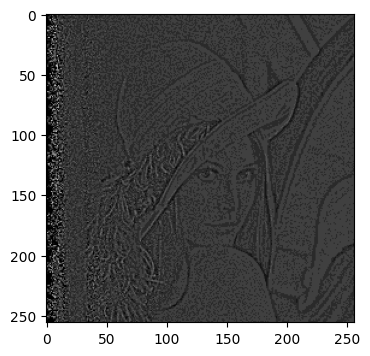

In [31]:
# Se realiza la divisón entre la g(x,y) entre la h(x,y) estimada para obtener la f(x,y) estimada

f_estimada = cv2.divide(imagen_con_ruido,img_difuminada)

resultado_normalizado = cv2.normalize(f_estimada, None, 0, 255, cv2.NORM_MINMAX)

plt.figure(figsize=(4,4))
plt.imshow(f_estimada, cmap = "gray")